##Práctico 2: Reducción de dimensionalidad

La primera parte del práctico incluye ejercicios de reducción de dimensionalidad realizadas con las tres técnicas vistas en clase, sobre los datos de célula única de halterios del proyecto FlyCellAtlas (FCA).

### Importar datos de FCA

Dentro de los datos de halterios encontrarán los resultados obtenidos por FCA al realizar PCA, t-SNE, y UMAP como técnicas de reducción de dimensionalidad.

### Comparar lo resultados anteriores con los obtenidos mediante:


1.   Análisis de componentes principales (PCA)


*   Código
*   Librería Sklearn
*   Librería Scanpy


2.   t-distributed Stochastic Neighbor Embedding (t-SNE)

*   Librería Sklearn
*   Librería Scanpy

3.   Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP)

*   Librería Sklearn
*   Librería Scanpy



In [ ]:
#instalar librerías
!pip install scanpy
!pip install umap-learn #para reducción de dimensionalidad UMAP


In [ ]:
#Importar librerias necesarios
from google.colab import drive #importar desde drive a colab
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive') #acceden a sus documentos de drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Primera actividad: cargar los datos de https://flycellatlas.org/

haltere_r =  '/content/drive/MyDrive/Curso/Practico 1|2/Datos/haltere.h5ad'
haltere_ds = sc.read_h5ad(haltere_r)
haltere_df = haltere_ds.to_df()

In [ ]:
#Visualización de la reducción de dimensionalidad realizado por FCA.
#PCA
PCA_fca = haltere_ds.obsm['X_pca']
#t-sne
tSNE_fca = haltere_ds.obsm['X_tsne']
#umap
UMAP_fca = haltere_ds.obsm['X_umap']

In [ ]:
PCA_fca.shape

(6527, 28)

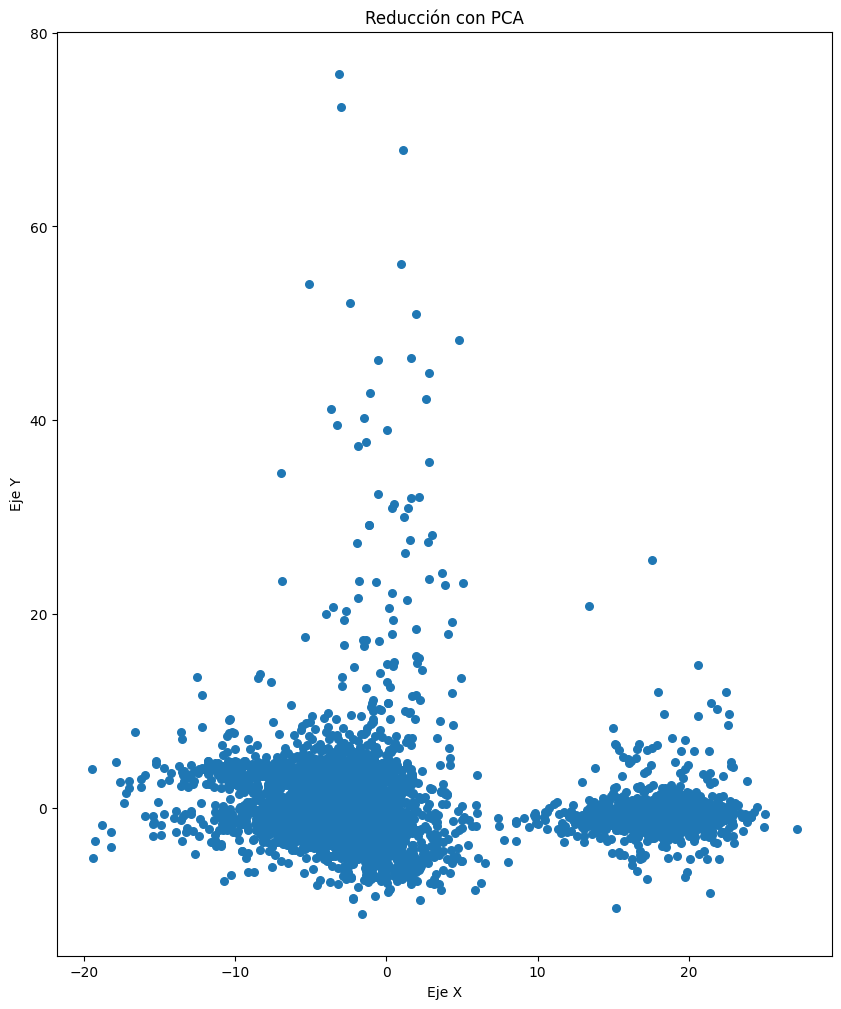

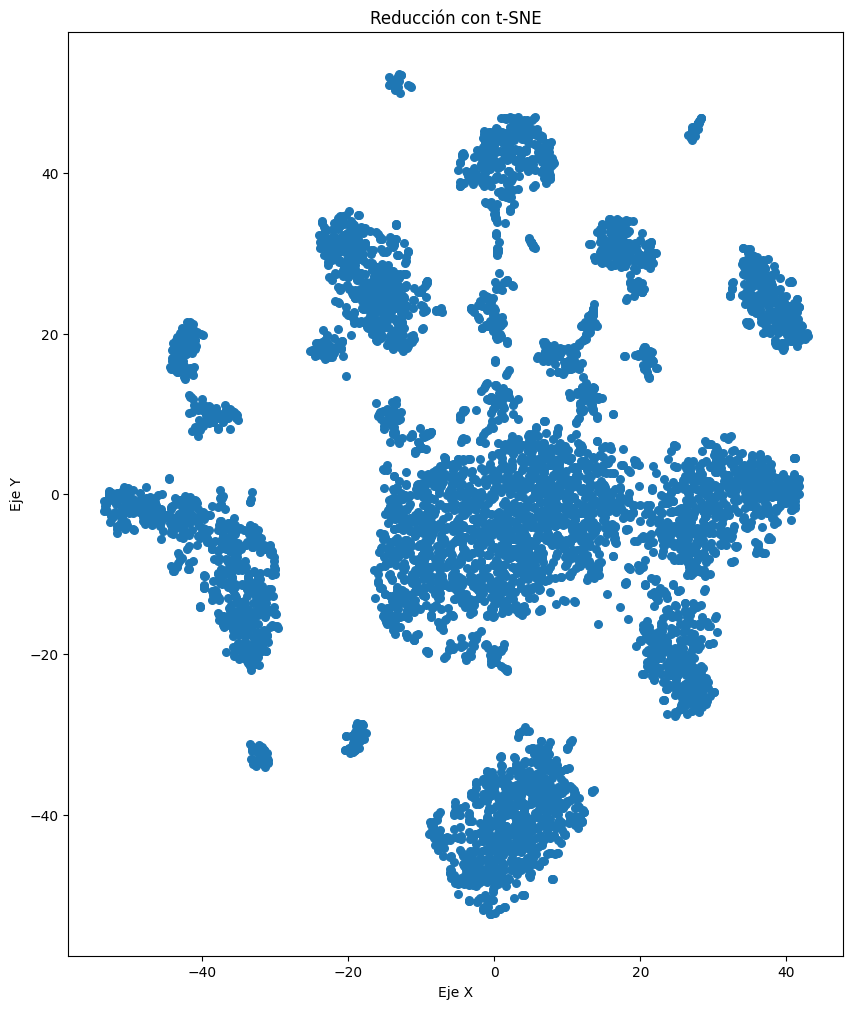

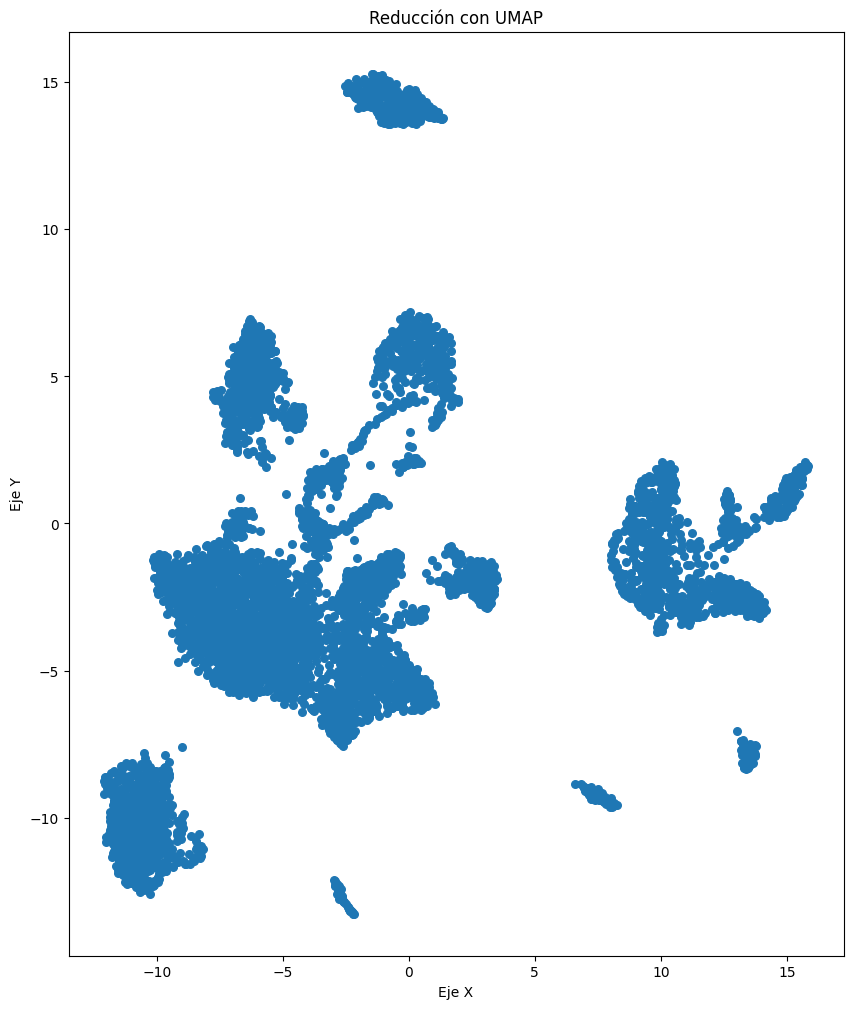

In [33]:
#Como son 'muchos' vamos a hacer una función.
#Durante el práctico la vamosa  ir 'completando'

def grafica(data, title, xlabel = 'Eje X', ylabel = 'Eje Y'):
  #datos por eje
  x = data[:, 0]
  y = data[:, 1]

  # Crea un gráfico de dispersión sin líneas
  plt.figure(figsize=(10, 12))
  plt.scatter(x, y, marker='o', s=30)  # todos los puntos tienen el mismo color
  plt.title(title)  # Agrega el título al gráfico
  plt.xlabel(xlabel)  # Etiqueta del eje X
  plt.ylabel(ylabel)  # Etiqueta del eje Y
  plt.show()



grafica(PCA_fca, 'Reducción con PCA')
grafica(tSNE_fca, 'Reducción con t-SNE')
grafica(UMAP_fca, 'Reducción con UMAP')

In [34]:
# Pasamos de DataFrame a Numpy Array
X = haltere_df.to_numpy()

In [35]:
#Vamor a calcular primero los componentes pricipales de forma manual, es decir, sin una librería

# Centramos los datos
media = np.mean(X, axis=0)
X_n = X - media
# Calcula la matriz de covarianza
cov_matrix = np.cov(X_n, rowvar=False)

# Calcula la matriz de covarianza
cov_matrix = np.cov(X_n, rowvar=False)

# Vectores y valores propios
val_propios, vec_propios = np.linalg.eig(cov_matrix)

# Ordena los vectores y valores propios
indices_ordenados = np.argsort(val_propios)[::-1]
val_propios = val_propios[indices_ordenados]
vec_propios = vec_propios[:, indices_ordenados]

# Obtenemos los componentes principales
nPCA = 2
componentes_principales = vec_propios[:, :nPCA]

# Proyecta los datos sobre las nuevas dimensiones obtenidas
X_pca_m = np.dot(X, componentes_principales)


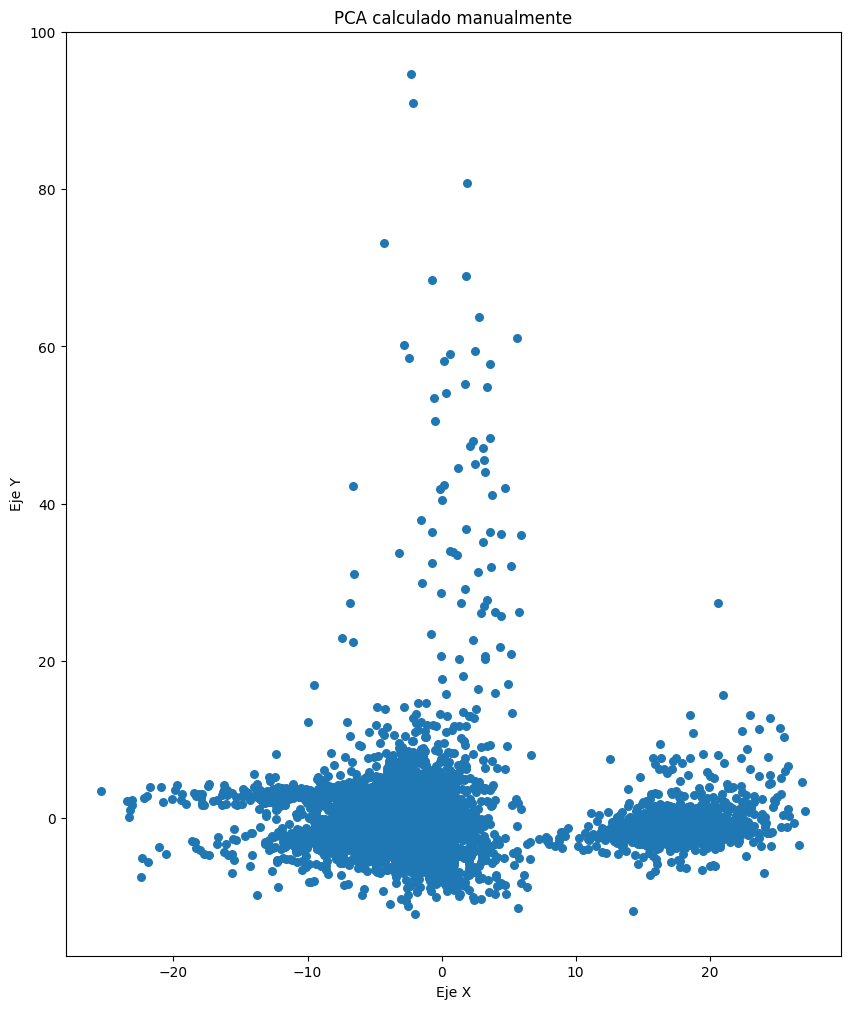

In [36]:
grafica(X_pca_m, title = 'PCA calculado manualmente')

In [37]:
#La librería scanpy permite almacenar las reducciones de dimensionalidad directamente en el archivo Anndata
#Hacemos un nuevo archivo Anndata para que no sobreescriba lo anterior

adata = sc.AnnData(X=haltere_df.to_numpy())
adata.var_names = haltere_df.columns  # Lista de nombres de genes
adata.obs_names = haltere_df.index  # Lista de nombres de celdas

#Tanto los nombres de las columnas como la de las filas deben ser declarados

In [38]:
#PCA con scanpy
print('Antes de aplicar reduccion de dimensionalidad', adata.obsm)
sc.tl.pca(adata)
print('Después de aplicar reduccion de dimensionalidad',adata.obsm)

Antes de aplicar reduccion de dimensionalidad AxisArrays with keys: 
Después de aplicar reduccion de dimensionalidad AxisArrays with keys: X_pca


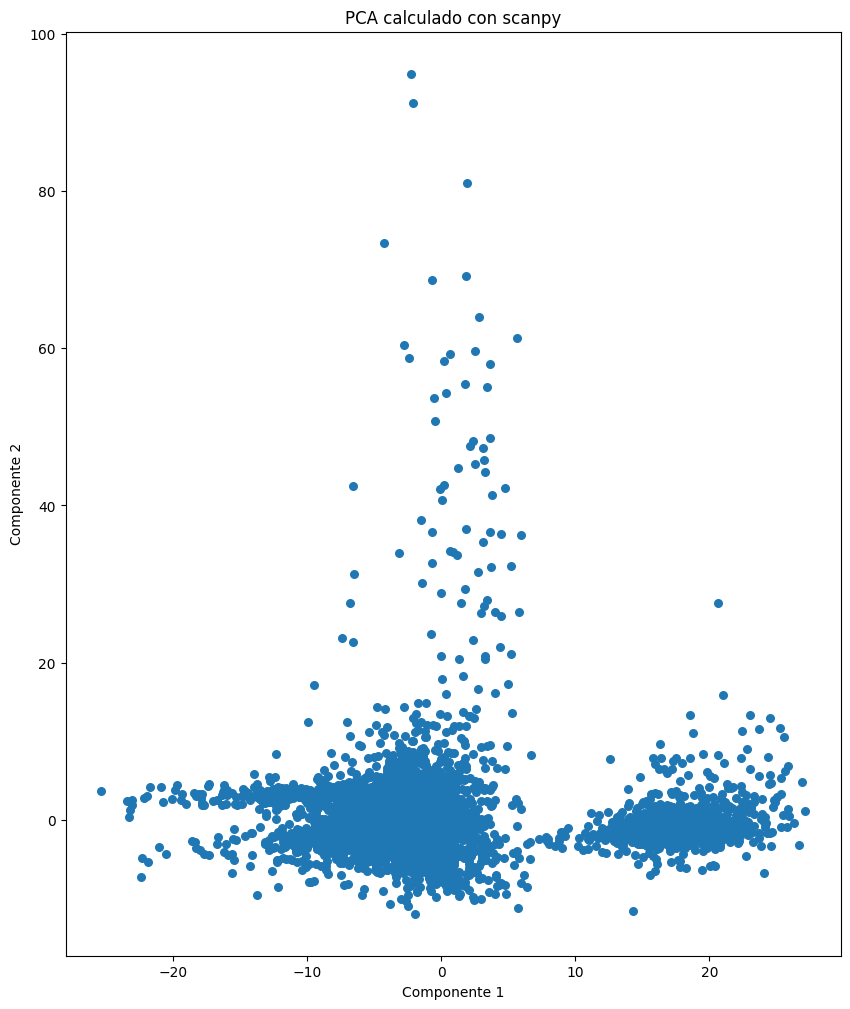

In [39]:
X_pca = adata.obsm['X_pca']
grafica(X_pca, title = 'PCA calculado con scanpy', xlabel = 'Componente 1', ylabel = 'Componente 2')

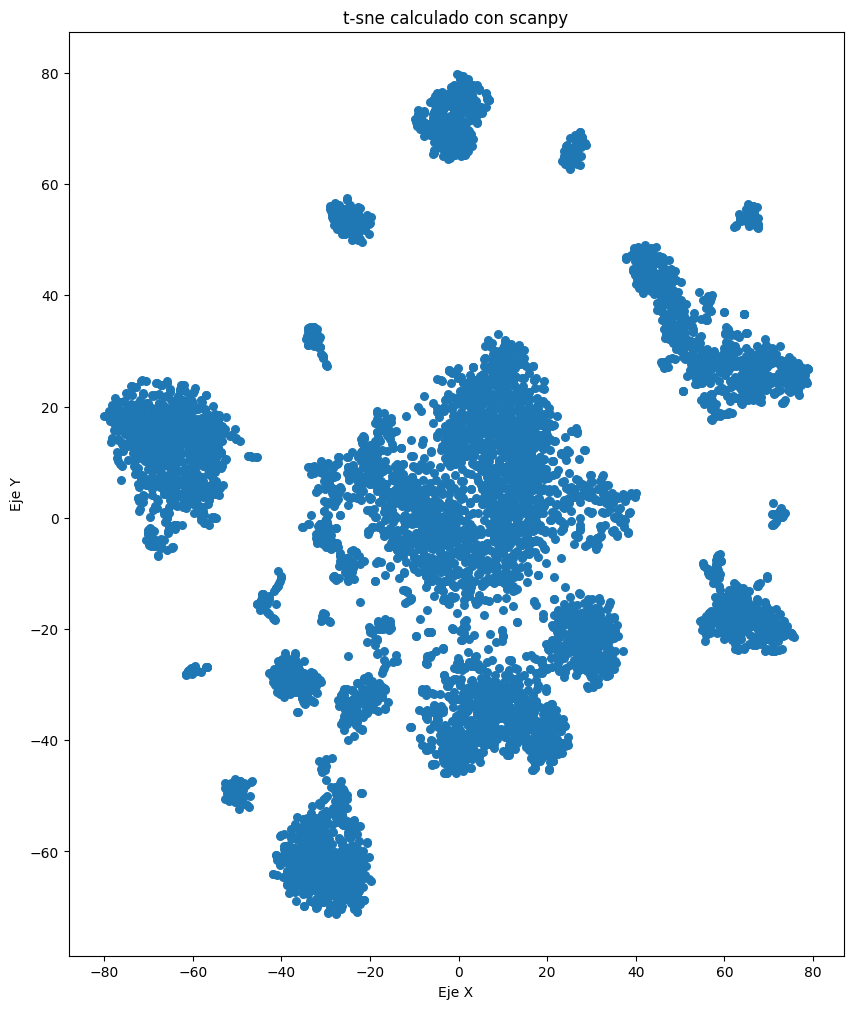

In [40]:
#Similar a lo anterior, con el método disponible en la librería scanpy
sc.tl.tsne(adata)
X_tsne = adata.obsm['X_tsne']
grafica(X_tsne, title = 't-sne calculado con scanpy')

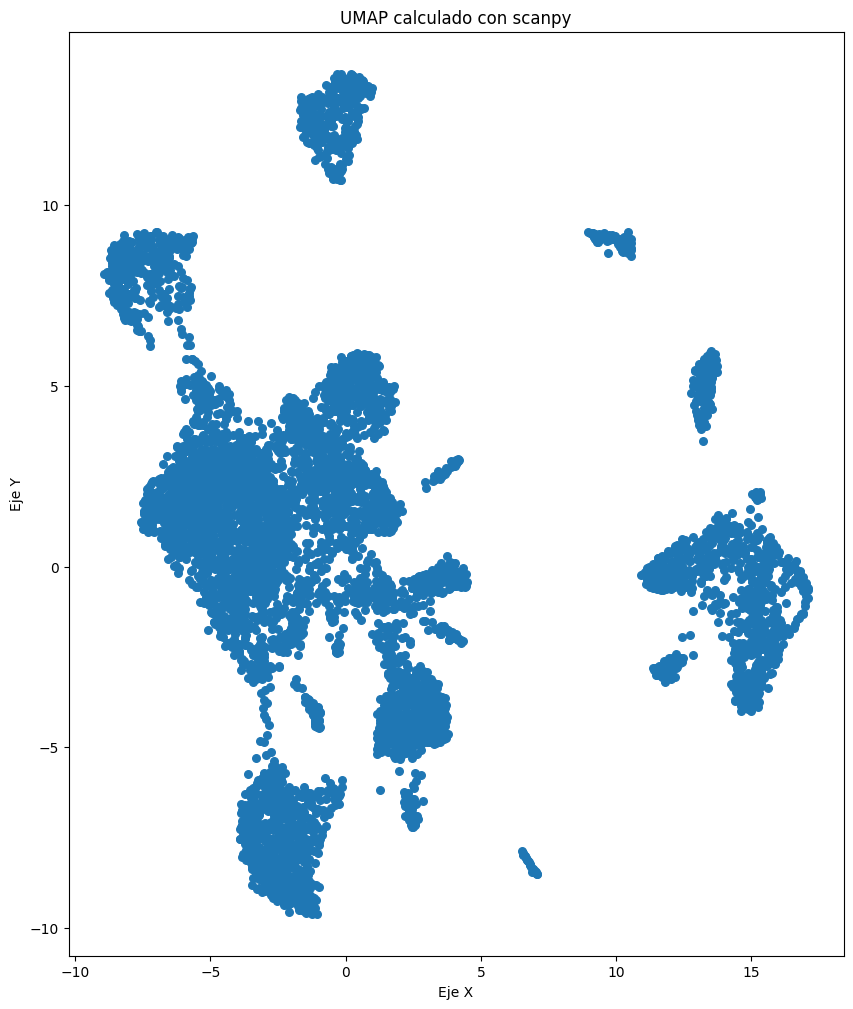

In [41]:
#Reducción UMAP con scanpy
sc.pp.neighbors(adata) #Necesario para calcular UMAP
sc.tl.umap(adata)
X_umap = adata.obsm['X_umap']
grafica(X_umap, title = 'UMAP calculado con scanpy')

In [42]:
#Ahora vamos a comparar los resultados al utilizar sklearn

In [43]:
# Pasamos de DataFrame a Numpy Array
X = haltere_df.fillna(0).to_numpy()

In [44]:
from sklearn.decomposition import PCA

N = 2
pca = PCA(n_components= 2)
X_pca_sklearn = pca.fit_transform(X.copy())

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=N)
X_tsne_sklearn = tsne.fit_transform(X.copy())

In [46]:
X.shape

(6527, 2171)

In [47]:
import umap

umap_model = umap.UMAP()
X_umap_lib =  umap_model.fit_transform(X.copy())

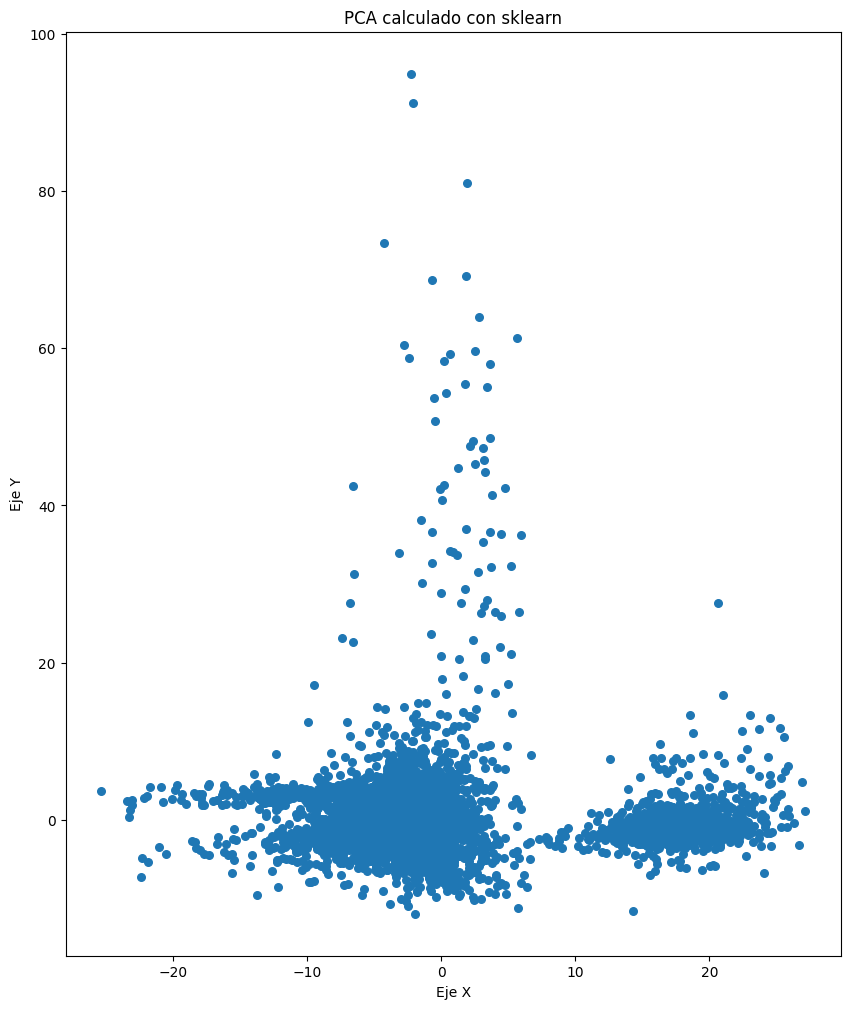

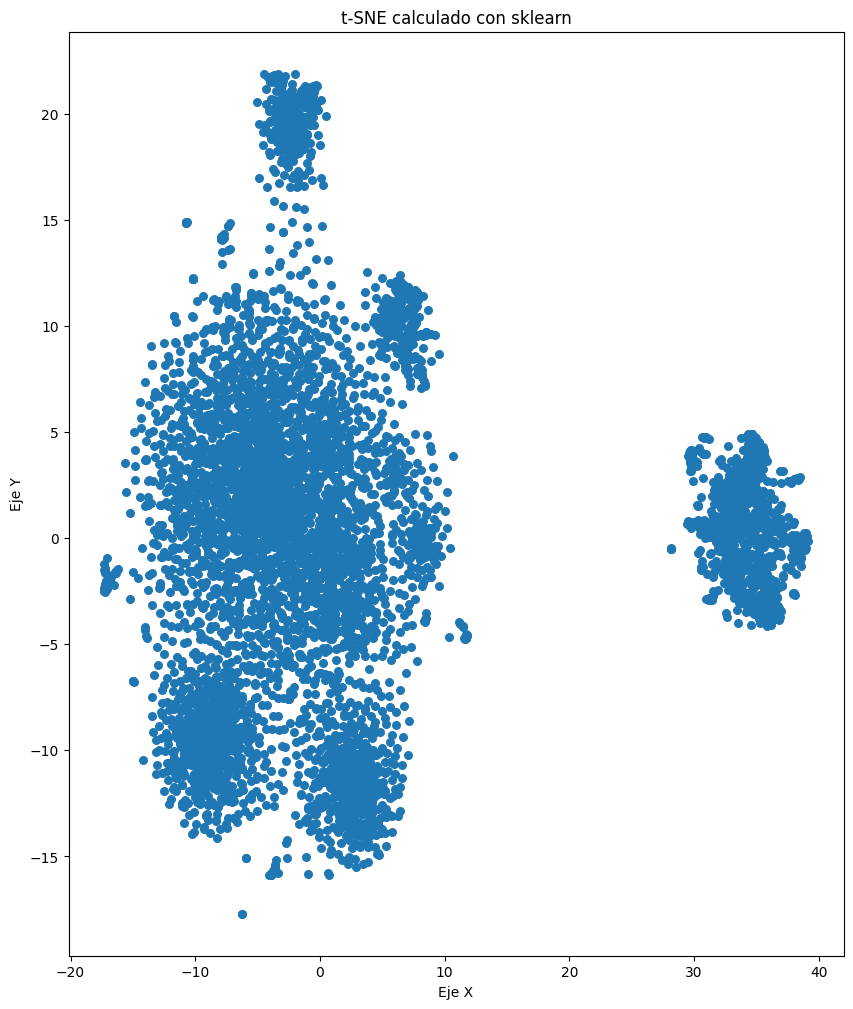

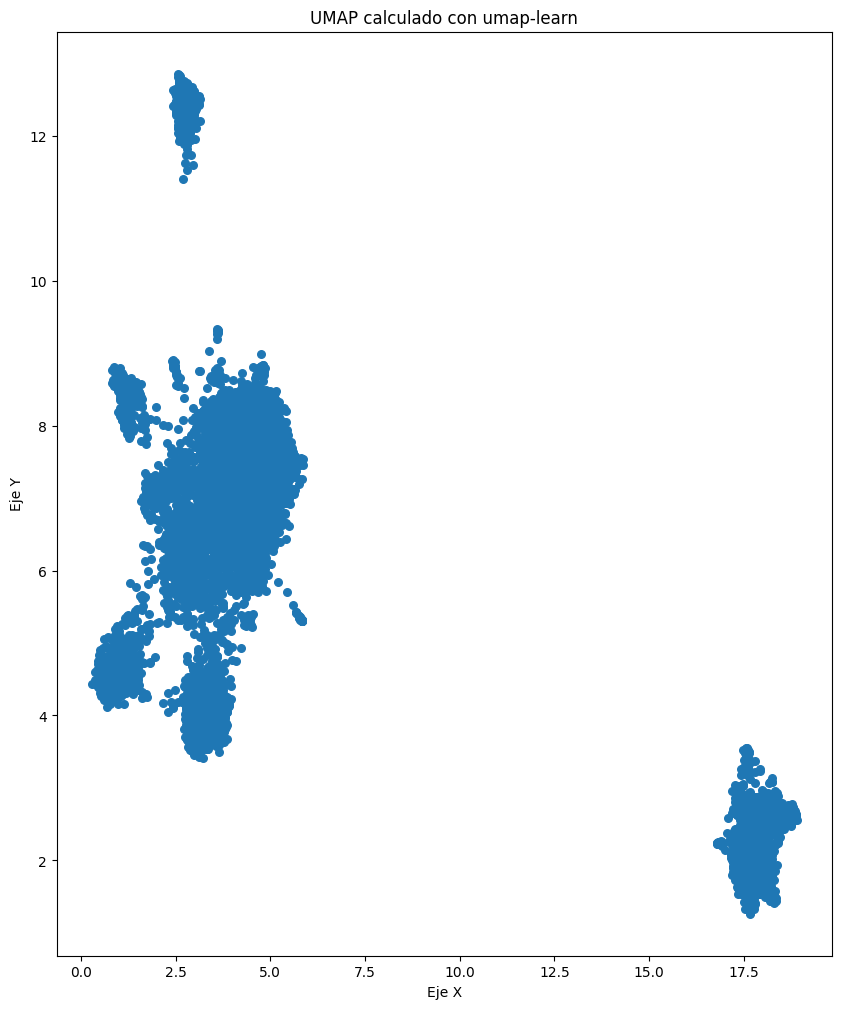

In [48]:
#Graficamos lo anterior
grafica(X_pca_sklearn, title = 'PCA calculado con sklearn')
grafica(X_tsne_sklearn, title = 't-SNE calculado con sklearn')
grafica(X_umap_lib, title = 'UMAP calculado con umap-learn')

In [49]:
#Podemos intuir que hay grupos dentro de las células mostradas
#Para validar lo anterior, vamos a etiquetas las células de acuerdo a las anotaciones entregadas
#Recordar que las anotaciones fueron curadas a mano por investigadores de los 40 laboratorias a cuales pertenece el proyecto, por medio de marcadores celulares
#Con la información anterior vamos a modificar nuestra función para que acepte etiquete y coloree los puntos

In [50]:
def grafica(data, title, xlabel = 'Eje X', ylabel = 'Eje Y', labels = None, c = None):
  aristas = []

  #datos por eje
  x = data[:, 0]
  y = data[:, 1]

  # Crea un gráfico de dispersión sin líneas
  plt.figure(figsize = (10, 12))
  plt.scatter(x, y, marker='o', s=30, c=c)  # todos los puntos tienen el mismo color

  # Personaliza el gráfico si es necesario
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Muestra el gráfico
  if labels is not None:
    # Agregar la leyenda al gráfico
    artistas = [plt.Line2D([0], [0], marker='o', color=color, label=label) for label, color in labels.items()]
    plt.legend(handles=artistas, title='Tipo celular', loc='best')
  plt.show()

# Etiquetas y colores comunes para todos nuestros datos:
etiquetas = list(haltere_ds.obs['annotation']) #obtenemos las anotaciones
etiqueta_unica = list(set(etiquetas))
mapeo_etiquetas = {etiqueta: 'C{}'.format(numero) for numero, etiqueta in enumerate(etiqueta_unica)}
colores = [mapeo_etiquetas[etiqueta] for etiqueta in etiquetas]



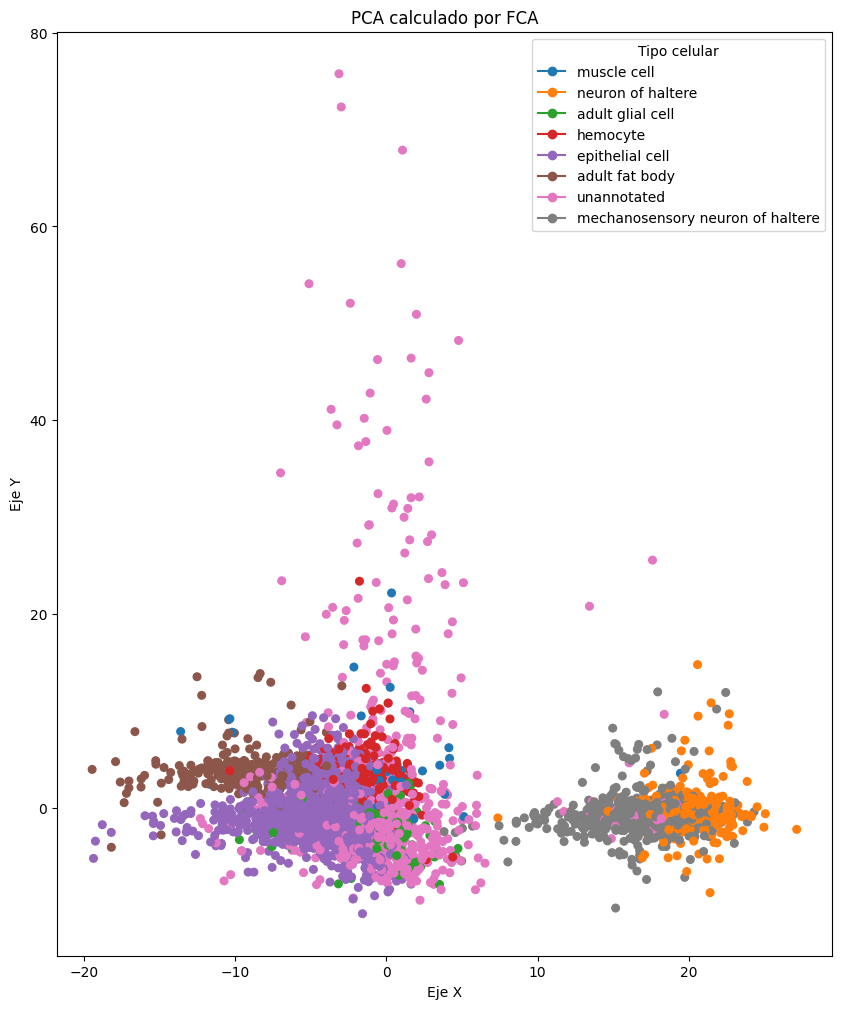

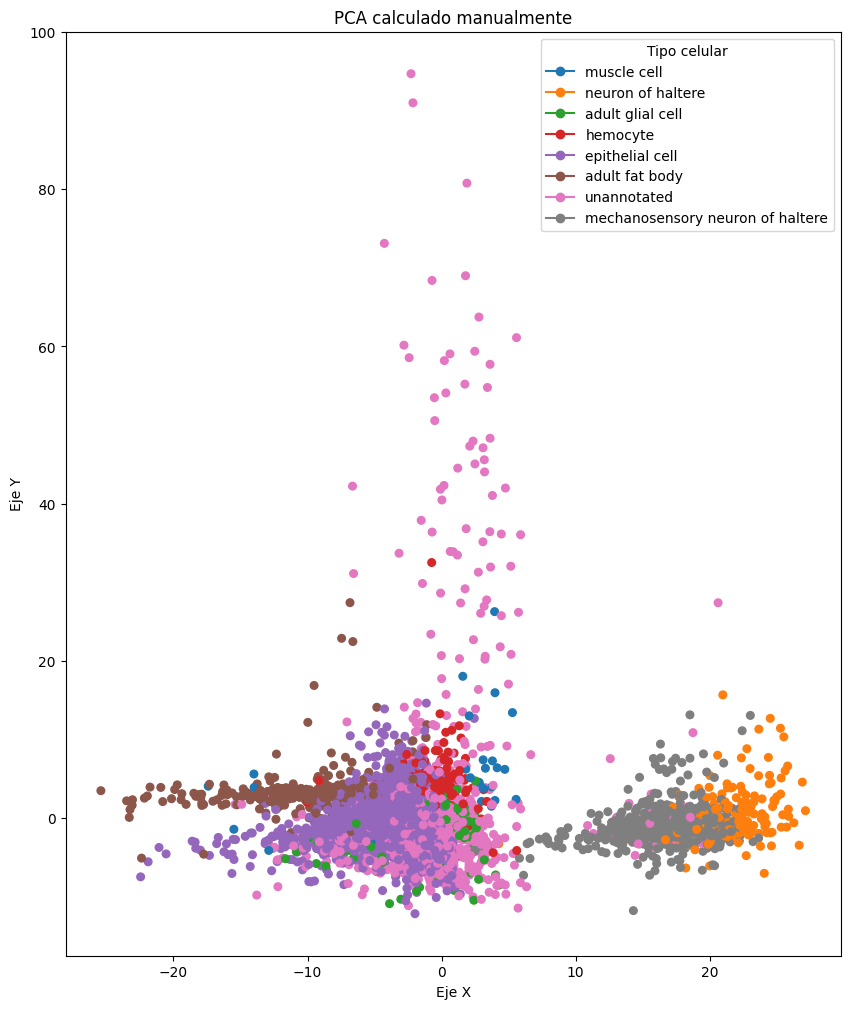

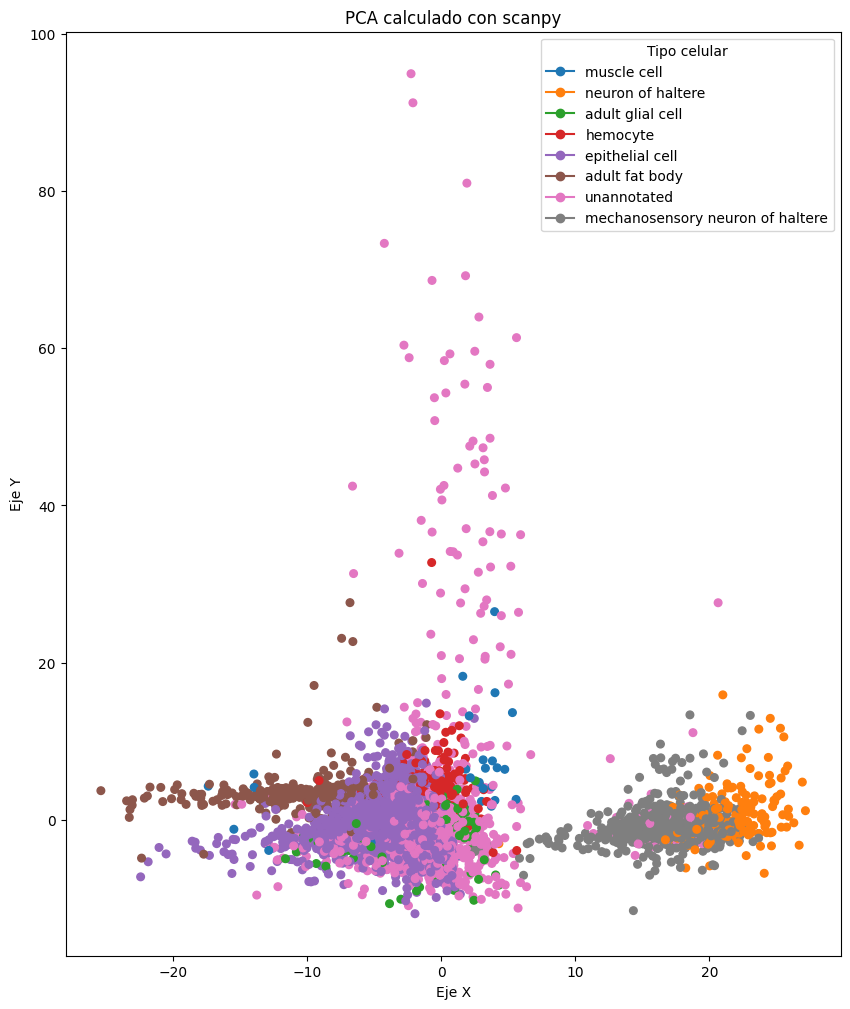

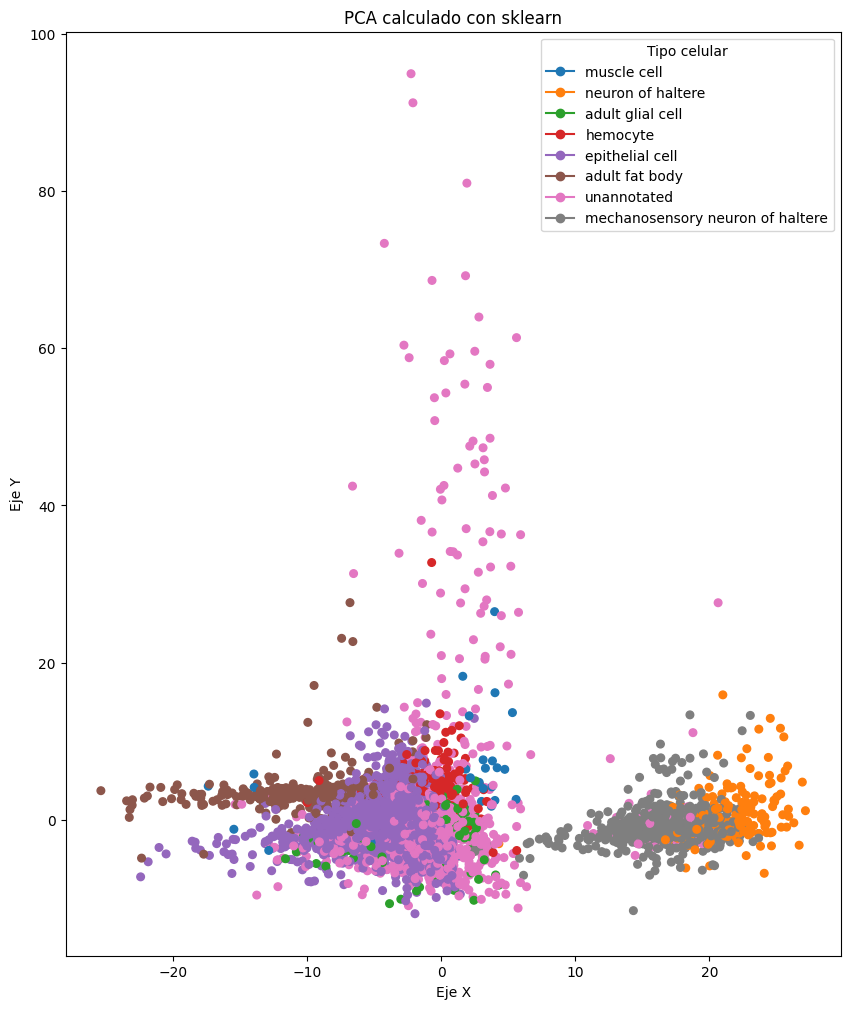

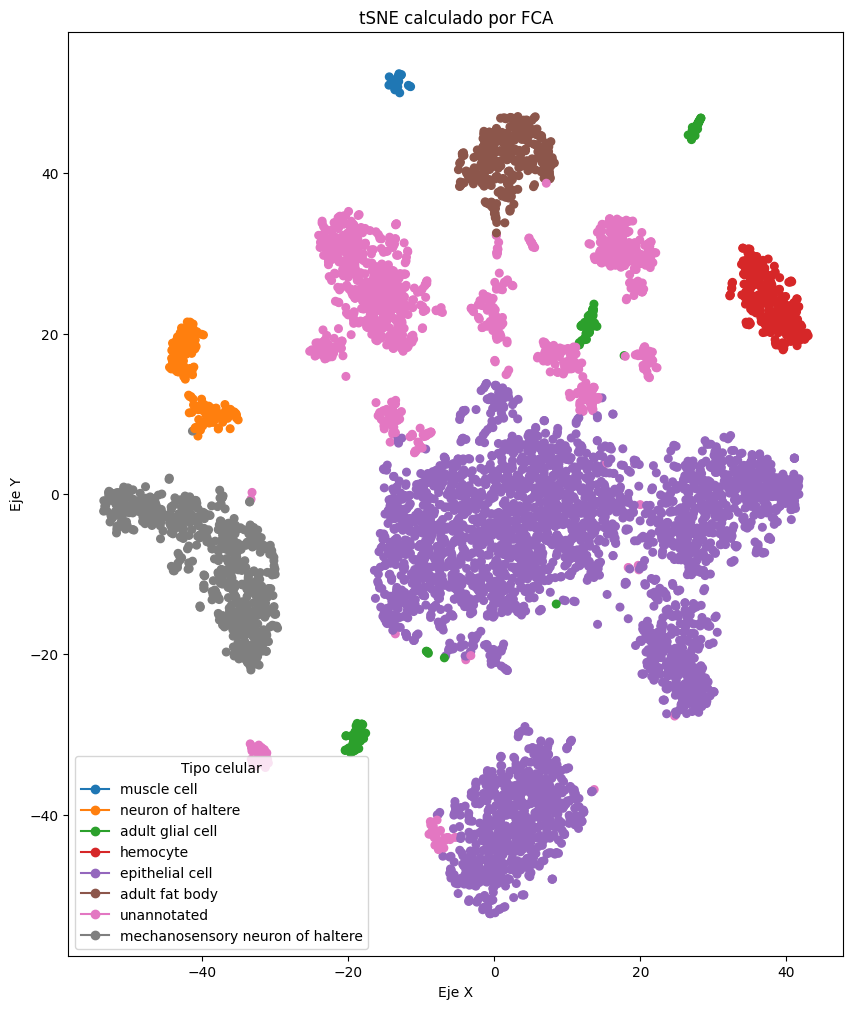

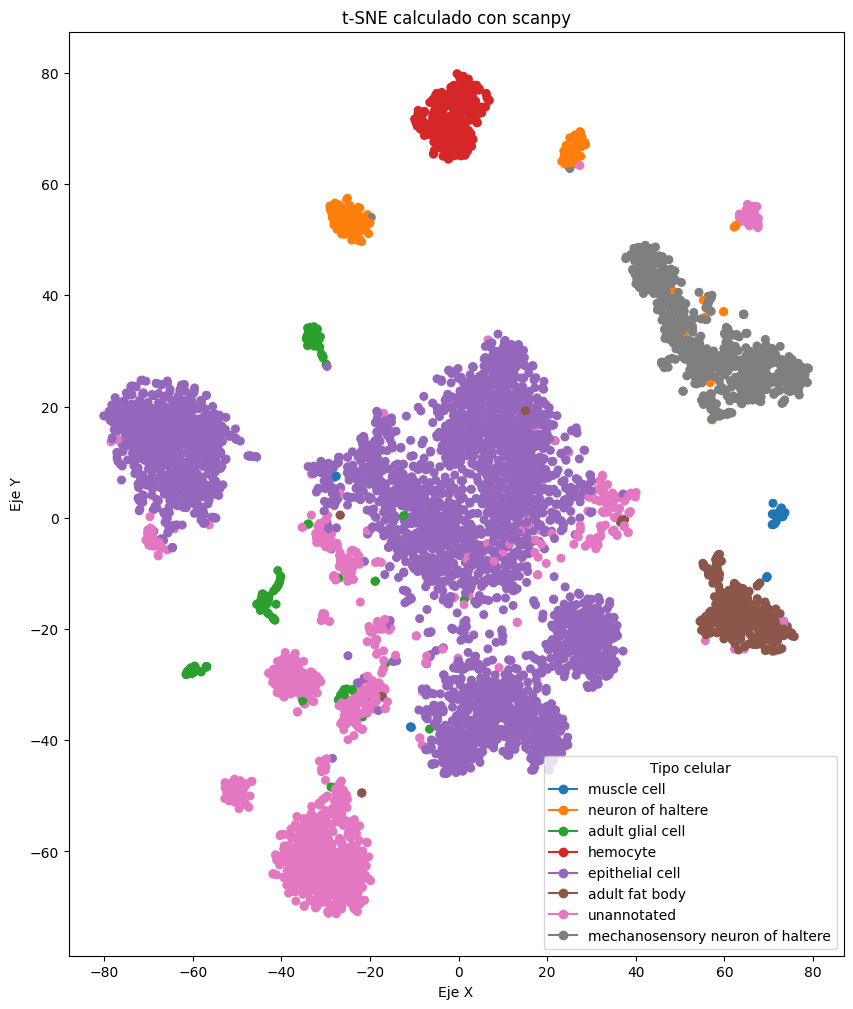

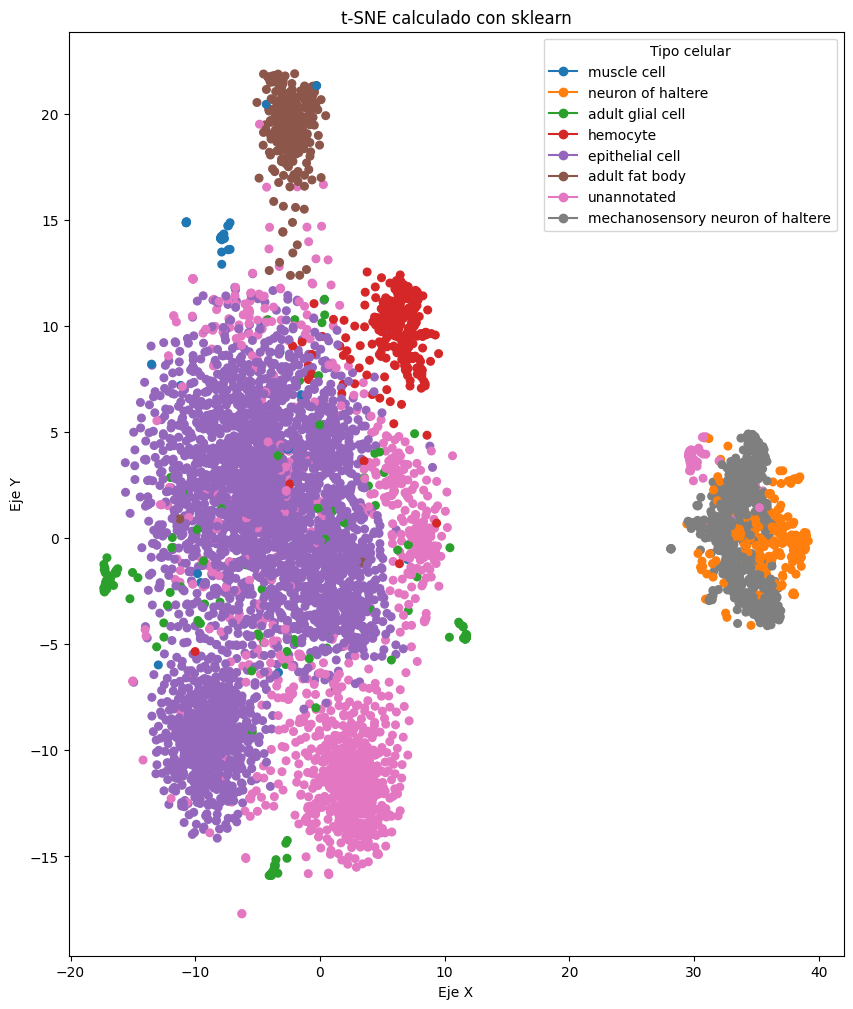

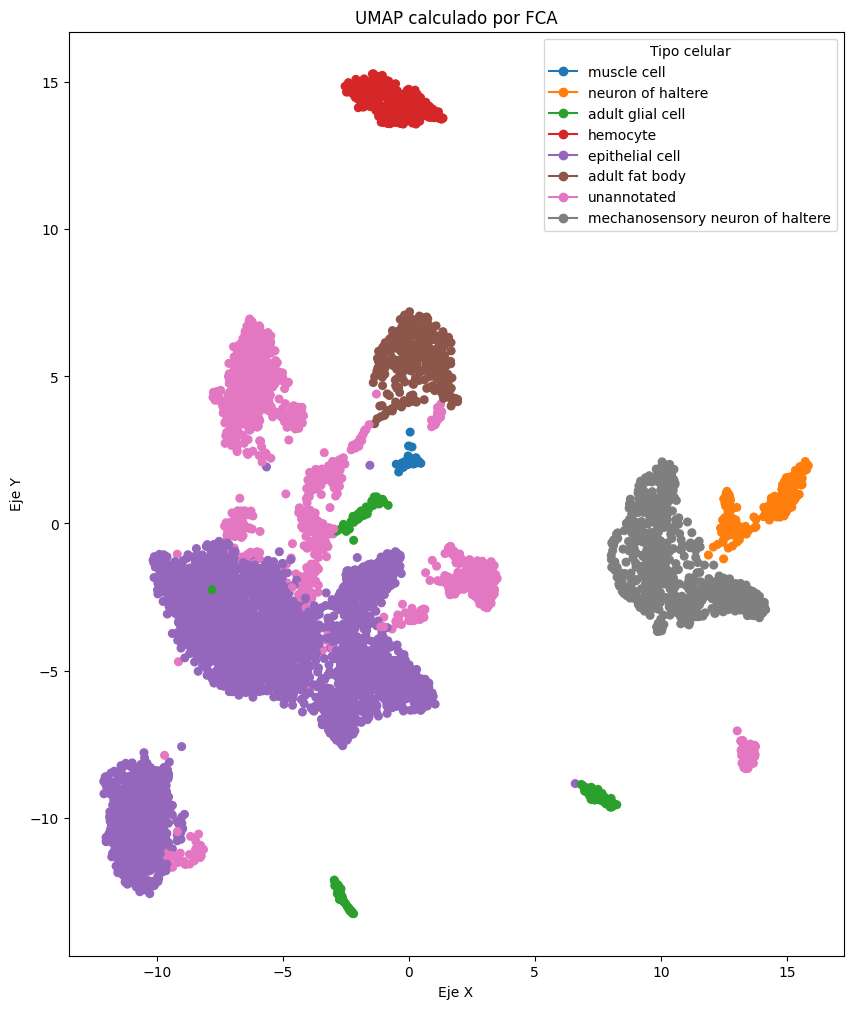

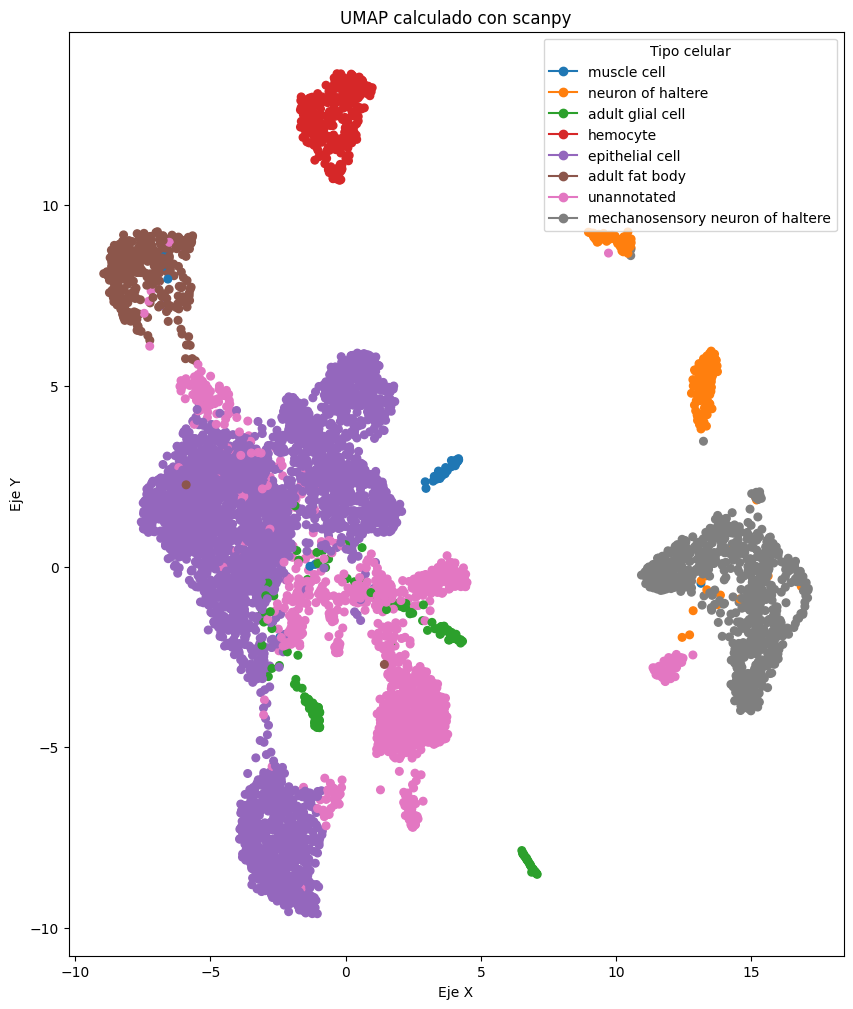

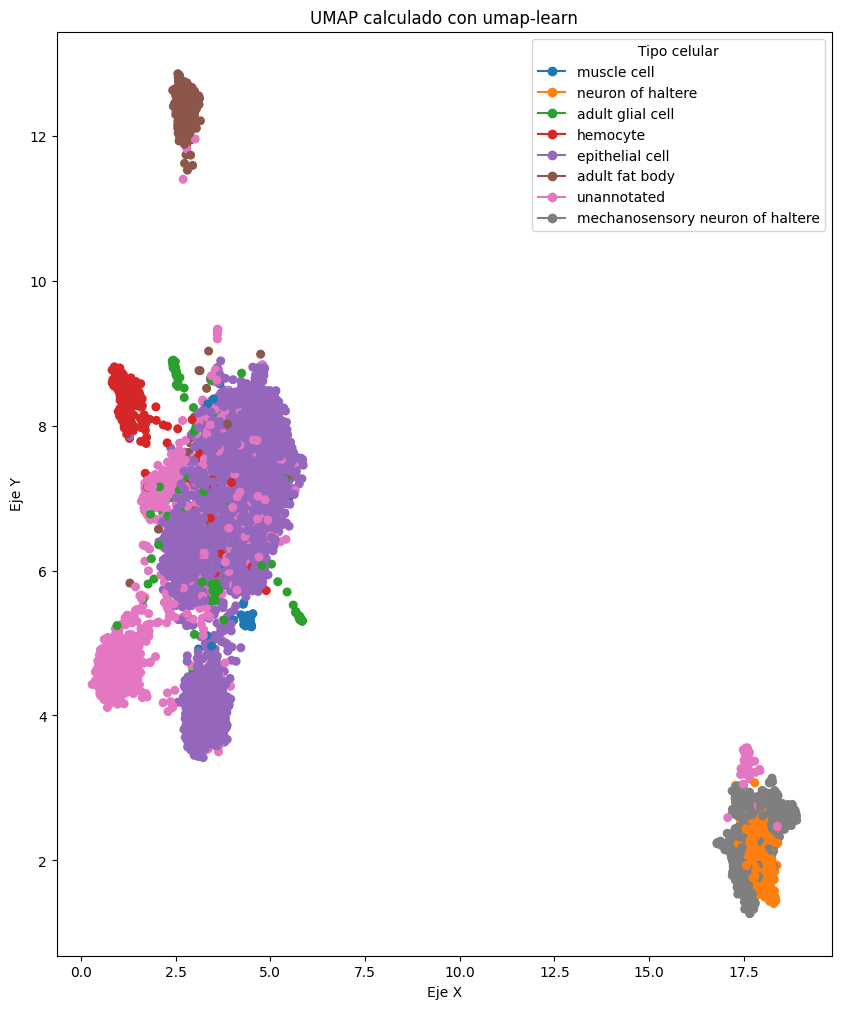

In [51]:
#Volvemos a graficar agregando lo anterior
grafica(PCA_fca, title = 'PCA calculado por FCA', c=colores, labels=mapeo_etiquetas)
grafica(X_pca_m, title = 'PCA calculado manualmente', c=colores, labels=mapeo_etiquetas)
grafica(X_pca, title = 'PCA calculado con scanpy', c=colores, labels=mapeo_etiquetas)
grafica(X_pca_sklearn, title = 'PCA calculado con sklearn', c=colores, labels=mapeo_etiquetas)


grafica(tSNE_fca, title = 'tSNE calculado por FCA', c=colores, labels=mapeo_etiquetas)
grafica(X_tsne, title = 't-SNE calculado con scanpy', c=colores, labels=mapeo_etiquetas)
grafica(X_tsne_sklearn, title = 't-SNE calculado con sklearn', c=colores, labels=mapeo_etiquetas)

grafica(UMAP_fca, title = 'UMAP calculado por FCA', c=colores, labels=mapeo_etiquetas)
grafica(X_umap, title = 'UMAP calculado con scanpy', c=colores, labels=mapeo_etiquetas)
grafica(X_umap_lib, title = 'UMAP calculado con umap-learn', c=colores, labels=mapeo_etiquetas)